In [66]:
from tensorflow import keras
import autokeras as ak
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [67]:
#!pip install seaborn

In [68]:
datafile = 'TIME_SERIES_DAILY_full_IBM_1min_year1month3.csv'


In [69]:
'''

for restoring any model

model1 = keras.models.load_model('keras-time-model-tf-1', custom_objects=ak.CUSTOM_OBJECTS)
model1.summary()
'''

"\nmodel1 = keras.models.load_model('keras-time-model-tf-1', custom_objects=ak.CUSTOM_OBJECTS)\nmodel1.summary()\n"

In [70]:

df = pd.read_csv(datafile, delimiter=',')
print(df.columns)
print(df.info)


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
<bound method DataFrame.info of        timestamp    open      high     low   close    volume
0     2021-04-13  133.00  133.6200  130.38  131.18   8030603
1     2021-04-12  135.02  135.3700  133.85  134.59   3753959
2     2021-04-09  134.87  135.7400  134.71  135.73   3023916
3     2021-04-08  134.57  135.6299  134.16  135.12   4087228
4     2021-04-07  133.84  134.9400  133.78  134.93   2976136
...          ...     ...       ...     ...     ...       ...
5391  1999-11-05   92.75   92.9400   90.19   90.25  13737600
5392  1999-11-04   94.44   94.4400   90.00   91.56  16697600
5393  1999-11-03   95.87   95.9400   93.50   94.37  10369100
5394  1999-11-02   96.75   96.8100   93.69   94.81  11105400
5395  1999-11-01   98.50   98.8100   96.37   96.75   9551800

[5396 rows x 6 columns]>


In [71]:
df.head()

,timestamp,open,high,low,close,volume
0,2021-04-13,133.00,133.6200,130.38,131.18,8030603
1,2021-04-12,135.02,135.3700,133.85,134.59,3753959
2,2021-04-09,134.87,135.7400,134.71,135.73,3023916
3,2021-04-08,134.57,135.6299,134.16,135.12,4087228
4,2021-04-07,133.84,134.9400,133.78,134.93,2976136


In [72]:
df['datetime']=pd.to_datetime(df['timestamp'])
#df.set_index(['datetime'],inplace=True)

#df[400:450].head(500)
df.head(10)

,timestamp,open,high,low,close,volume,datetime
0,2021-04-13,133.00,133.6200,130.38,131.18,8030603,2021-04-13
1,2021-04-12,135.02,135.3700,133.85,134.59,3753959,2021-04-12
2,2021-04-09,134.87,135.7400,134.71,135.73,3023916,2021-04-09
3,2021-04-08,134.57,135.6299,134.16,135.12,4087228,2021-04-08
4,2021-04-07,133.84,134.9400,133.78,134.93,2976136,2021-04-07
5,2021-04-06,135.58,135.6400,134.09,134.22,3620964,2021-04-06
6,2021-04-05,133.64,136.6900,133.40,135.93,5471616,2021-04-05
7,2021-04-01,133.76,133.9300,132.27,133.23,4074161,2021-04-01
8,2021-03-31,134.54,134.7100,132.71,133.26,4945315,2021-03-31
9,2021-03-30,135.86,136.2700,134.02,134.72,4790366,2021-03-30


In [73]:
print("Rows               : ", df.shape[0])
print("Coloumns           : ", df.shape[1])
print("\nMissing values     : \n", df.isnull().any())
print("\nUnique values      : \n", df.nunique())

Rows               :  5396
Coloumns           :  7

Missing values     : 
 timestamp    False
open         False
high         False
low          False
close        False
volume       False
datetime     False
dtype: bool

Unique values      : 
 timestamp    5396
open         3990
high         4173
low          4200
close        4248
volume       5301
datetime     5396
dtype: int64


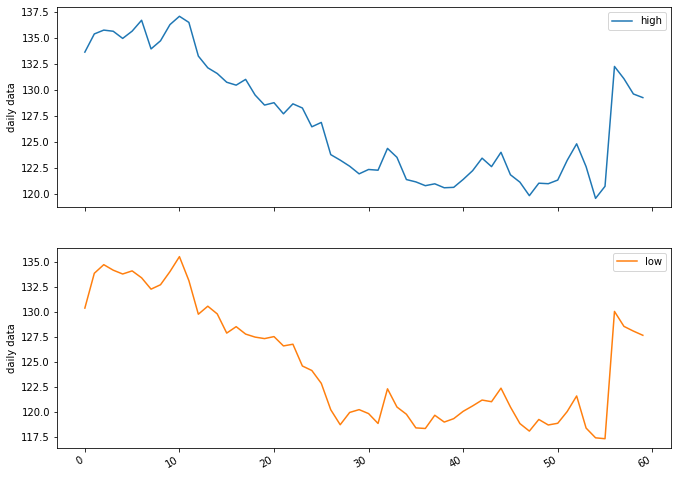

In [74]:
cols_plot = ['high','low']
# last 60 days
axes = df[cols_plot].head(60).plot(figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('daily data')

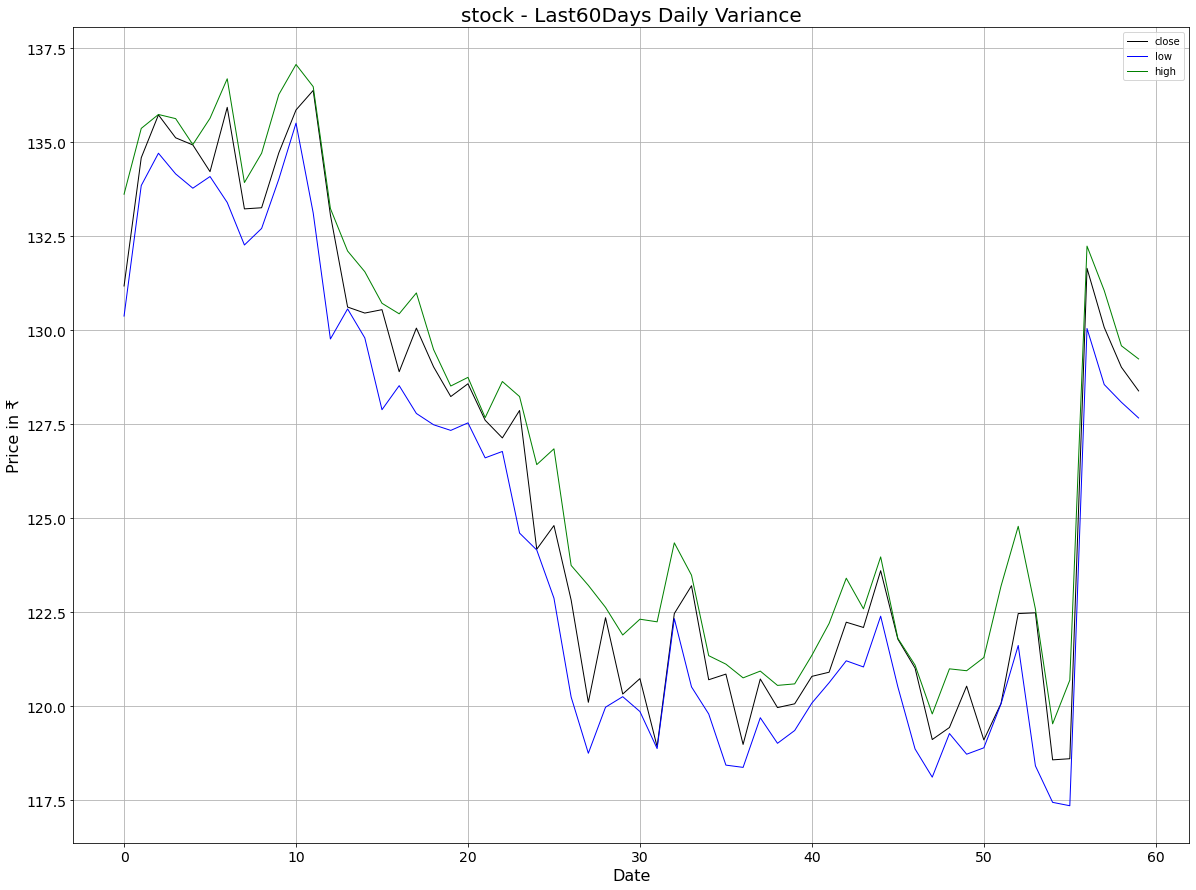

In [75]:
days = 60

plt.figure(figsize = (20,15))
plt.tick_params(axis = 'both', labelsize = 14)
df['close'].head(days).plot(color = 'k', lw = 1, label = 'close')  
df['low'].head(days).plot(color = 'b', lw = 1, label = 'low')
df['high'].head(days).plot(color = 'g', lw = 1, label = 'high') 
plt.ylabel('Price in ₹', fontsize = 16 )
plt.xlabel('Date', fontsize = 16 )
plt.title('stock' + ' - Last' + str(days) + 'Days Daily Variance', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [76]:

# univariate data preparation

 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [77]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(look_back-1,len(dataset)-look_back-1):
        print(str(i)+','+str(look_back-1)+','+str(len(dataset)))
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)



In [78]:
df['diff'] = df['high'] - df['low']

In [79]:
df.head()

,timestamp,open,high,low,close,volume,datetime,diff
0,2021-04-13,133.00,133.6200,130.38,131.18,8030603,2021-04-13,3.2400
1,2021-04-12,135.02,135.3700,133.85,134.59,3753959,2021-04-12,1.5200
2,2021-04-09,134.87,135.7400,134.71,135.73,3023916,2021-04-09,1.0300
3,2021-04-08,134.57,135.6299,134.16,135.12,4087228,2021-04-08,1.4699
4,2021-04-07,133.84,134.9400,133.78,134.93,2976136,2021-04-07,1.1600


In [80]:
# scale to 0-1 for lstm

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['high', 'low', 'diff']] = scaler.fit_transform(df[['high', 'low', 'diff']])
df.head()

,timestamp,open,high,low,close,volume,datetime,diff
0,2021-04-13,133.00,0.483166,0.476449,131.18,8030603,2021-04-13,0.239635
1,2021-04-12,135.02,0.494158,0.498097,134.59,3753959,2021-04-12,0.097015
2,2021-04-09,134.87,0.496482,0.503462,135.73,3023916,2021-04-09,0.056385
3,2021-04-08,134.57,0.495791,0.500031,135.12,4087228,2021-04-08,0.092861
4,2021-04-07,133.84,0.491457,0.497660,134.93,2976136,2021-04-07,0.067164


In [81]:
split = int(df.shape[0] * 0.1)
testdf = df[:split]
testdf.head()

,timestamp,open,high,low,close,volume,datetime,diff
0,2021-04-13,133.00,0.483166,0.476449,131.18,8030603,2021-04-13,0.239635
1,2021-04-12,135.02,0.494158,0.498097,134.59,3753959,2021-04-12,0.097015
2,2021-04-09,134.87,0.496482,0.503462,135.73,3023916,2021-04-09,0.056385
3,2021-04-08,134.57,0.495791,0.500031,135.12,4087228,2021-04-08,0.092861
4,2021-04-07,133.84,0.491457,0.497660,134.93,2976136,2021-04-07,0.067164


In [82]:
testdf.tail()

,timestamp,open,high,low,close,volume,datetime,diff
534,2019-02-28,138.77,0.517337,0.522241,138.13,3457788,2019-02-28,0.082090
535,2019-02-27,139.25,0.520540,0.526483,139.17,2530968,2019-02-27,0.067993
536,2019-02-26,139.67,0.526319,0.533159,139.72,3060381,2019-02-26,0.055556
537,2019-02-25,140.00,0.526193,0.532223,139.46,3194161,2019-02-25,0.066335
538,2019-02-22,138.73,0.519347,0.526670,139.25,3113698,2019-02-22,0.049751


In [83]:
traindf = df[split:]
traindf.head()


,timestamp,open,high,low,close,volume,datetime,diff
539,2019-02-21,137.82,0.512877,0.519933,137.84,2937467,2019-02-21,0.053897
540,2019-02-20,138.76,0.518467,0.519122,138.00,3801979,2019-02-20,0.138474
541,2019-02-19,137.81,0.515075,0.519995,138.70,3385675,2019-02-19,0.082090
542,2019-02-15,137.58,0.511872,0.520182,138.03,3844062,2019-02-15,0.037313
543,2019-02-14,137.17,0.508166,0.512821,136.48,2789839,2019-02-14,0.086235


In [84]:
traindf.tail()

,timestamp,open,high,low,close,volume,datetime,diff
5391,1999-11-05,92.75,0.227638,0.225716,90.25,13737600,1999-11-05,0.199005
5392,1999-11-04,94.44,0.237060,0.224531,91.56,16697600,1999-11-04,0.339138
5393,1999-11-03,95.87,0.246482,0.246366,94.37,10369100,1999-11-03,0.173300
5394,1999-11-02,96.75,0.251947,0.247551,94.81,11105400,1999-11-02,0.229685
5395,1999-11-01,98.50,0.264510,0.264271,96.75,9551800,1999-11-01,0.173300


In [85]:
cols = ['high','low','diff']
traindf_ak = traindf[cols].copy().reset_index(drop=True)
traindf_ak.head()

,high,low,diff
0,0.512877,0.519933,0.053897
1,0.518467,0.519122,0.138474
2,0.515075,0.519995,0.082090
3,0.511872,0.520182,0.037313
4,0.508166,0.512821,0.086235


In [86]:
traindf_ak.tail()

,high,low,diff
4852,0.227638,0.225716,0.199005
4853,0.237060,0.224531,0.339138
4854,0.246482,0.246366,0.173300
4855,0.251947,0.247551,0.229685
4856,0.264510,0.264271,0.173300


In [87]:
cols = ['high','low','diff']
testdf_ak = testdf[cols].copy().reset_index(drop=True)
testdf_ak.head()

,high,low,diff
0,0.483166,0.476449,0.239635
1,0.494158,0.498097,0.097015
2,0.496482,0.503462,0.056385
3,0.495791,0.500031,0.092861
4,0.491457,0.497660,0.067164


In [88]:
testdf_ak.tail()

,high,low,diff
534,0.517337,0.522241,0.082090
535,0.520540,0.526483,0.067993
536,0.526319,0.533159,0.055556
537,0.526193,0.532223,0.066335
538,0.519347,0.526670,0.049751


In [89]:
#traindf_ak.to_csv('traindf_ak.csv')
#testdf_ak.to_csv('testdf_ak.csv')
trainsh, trainsl, trainsd = traindf_ak['high'].values, traindf_ak['low'].values, traindf_ak['diff'].values
testsh, testsl, testsd = testdf_ak['high'].values, testdf_ak['low'].values, testdf_ak['diff'].values

# prepare data

x1, y1 = split_sequence(trainsh, 30)
x2, y2 = split_sequence(trainsl, 30)
x3, y3 = split_sequence(trainsd, 30)

x1_test, y1_test = split_sequence(testsh, 30)
x2_test, y2_test = split_sequence(testsl, 30)
x3_test, y3_test = split_sequence(testsd, 30)

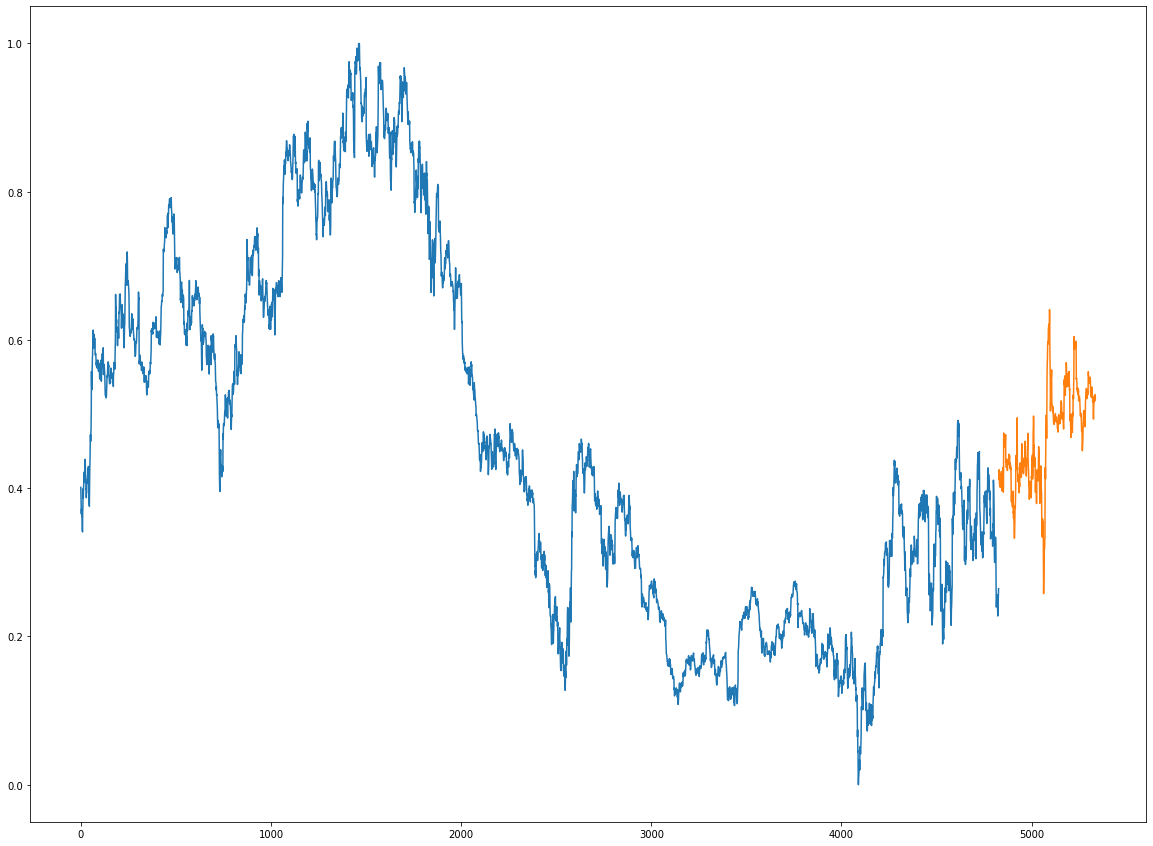

In [90]:
days_plot = 60

plt.figure(figsize = (20,15))
plt.plot(y1)
plt.plot([None for i in y1] + [x for x in y1_test])
plt.show()

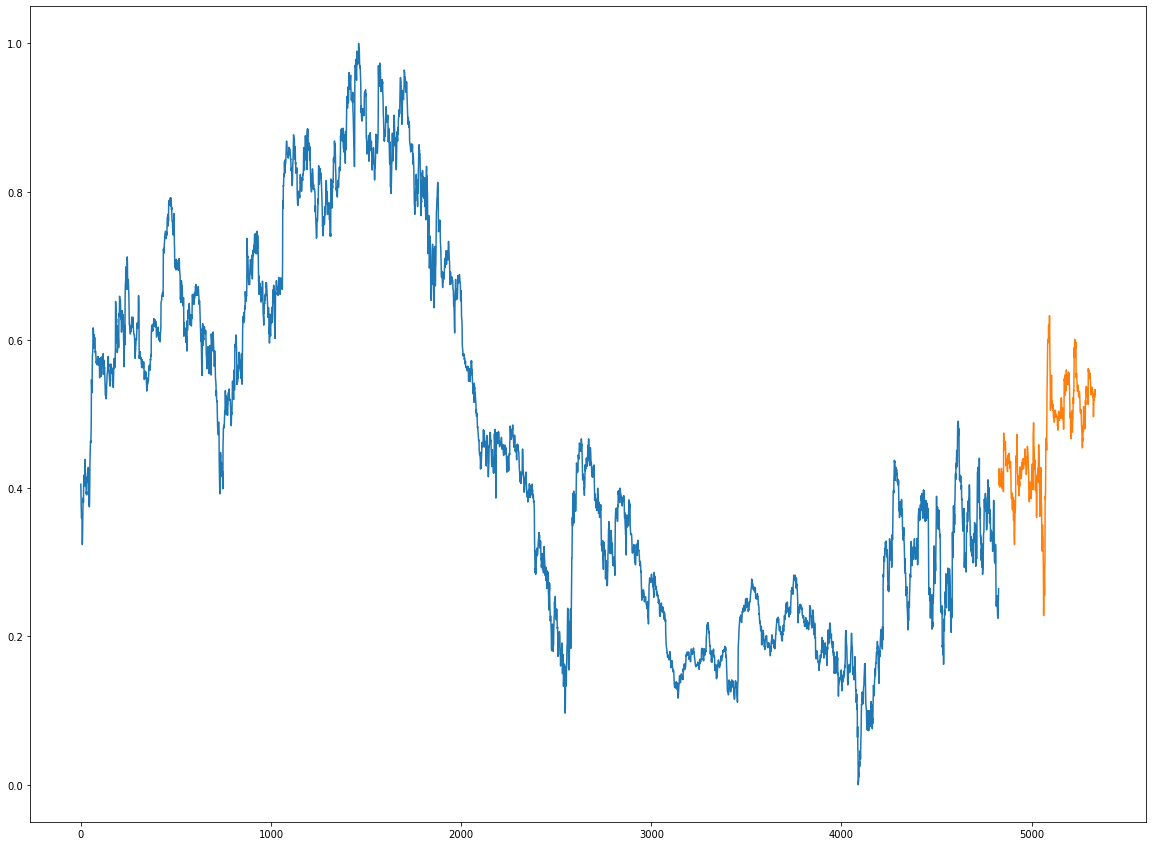

In [91]:
plt.figure(figsize = (20,15))
plt.plot(y2)
plt.plot([None for i in y2] + [x for x in y2_test])
plt.show()

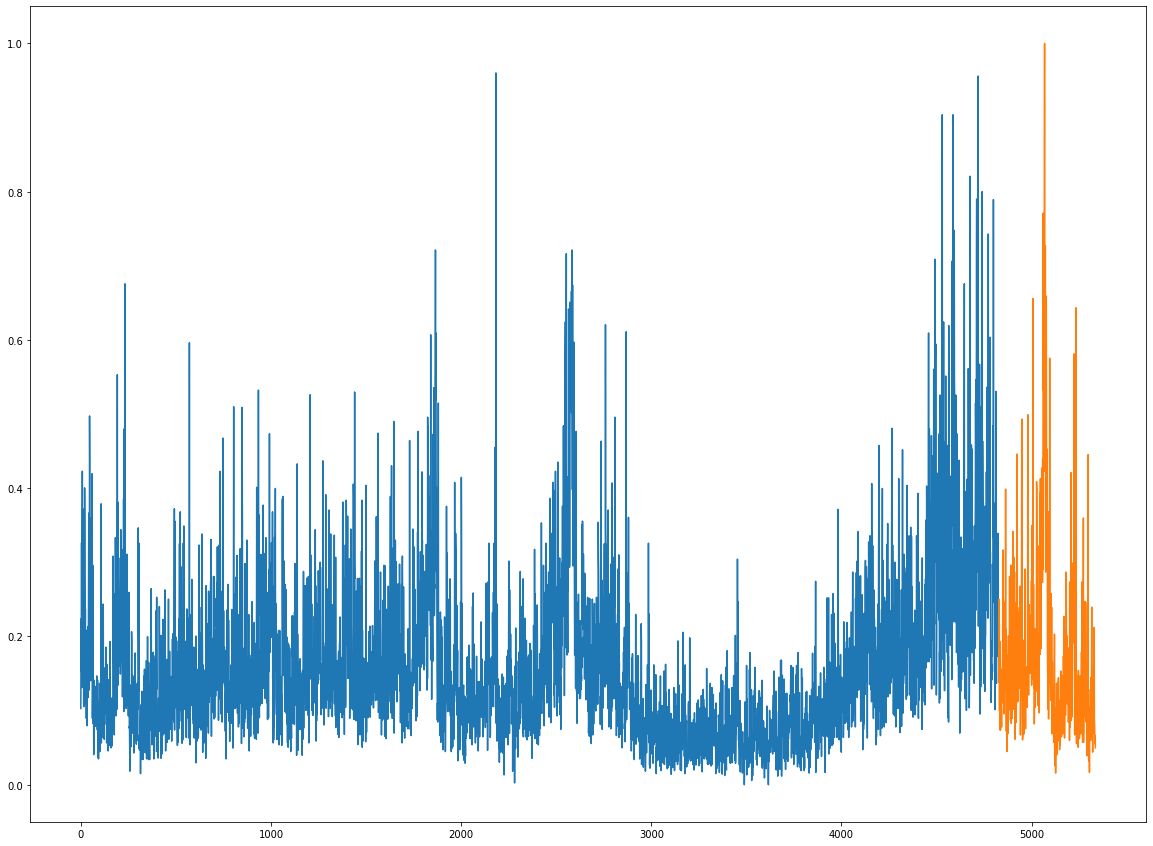

In [92]:
plt.figure(figsize = (20,15))
plt.plot(y3)
plt.plot([None for i in y3] + [x for x in y3_test])
plt.show()

In [93]:
print("reshaping data")
x1 = np.reshape(x1, (x1.shape[0], x1.shape[1], 1))
x1_test = np.reshape(x1_test, (x1_test.shape[0], x1_test.shape[1], 1))
x2 = np.reshape(x2, (x2.shape[0], x2.shape[1], 1))
x2_test = np.reshape(x2_test, (x2_test.shape[0], x2_test.shape[1], 1))
x3 = np.reshape(x3, (x3.shape[0], x3.shape[1], 1))
x3_test = np.reshape(x3_test, (x3_test.shape[0], x3_test.shape[1], 1))
y1 = np.expand_dims(y1, axis=1)
y2 = np.expand_dims(y2, axis=1)
y3 = np.expand_dims(y3, axis=1)
y1_test = np.expand_dims(y1_test, axis=1)
y2_test = np.expand_dims(y2_test, axis=1)
y3_test = np.expand_dims(y3_test, axis=1)

reshaping data


In [94]:
print(x1[:1])
print(x2[:1])
print(x3[:1])
print(y1[:1])
print(y2[:1])
print(y3[:1])
print(x1_test[:1])
print(x2_test[:1])
print(x3_test[:1])
print(y1_test[:1])
print(y2_test[:1])
print(y3_test[:1])

[[[0.51287688]
  [0.51846734]
  [0.51507538]
  [0.51187186]
  [0.50816583]
  [0.51017588]
  [0.49937186]
  [0.49277638]
  [0.48373116]
  [0.48850503]
  [0.50219849]
  [0.49698492]
  [0.49309045]
  [0.49309045]
  [0.49007538]
  [0.49202261]
  [0.49440955]
  [0.4906407 ]
  [0.48831658]
  [0.48059045]
  [0.49183417]
  [0.42148241]
  [0.42726131]
  [0.41275126]
  [0.41017588]
  [0.40973618]
  [0.40169598]
  [0.40778894]
  [0.40929648]
  [0.40640704]]]
[[[0.51993262]
  [0.51912159]
  [0.51999501]
  [0.52018217]
  [0.51282051]
  [0.51406825]
  [0.50439828]
  [0.49847152]
  [0.48774097]
  [0.48730426]
  [0.50633227]
  [0.5047726 ]
  [0.49273192]
  [0.49497785]
  [0.49741094]
  [0.49435398]
  [0.49653753]
  [0.49017406]
  [0.48923826]
  [0.48299956]
  [0.47601223]
  [0.4212989 ]
  [0.42859817]
  [0.41512259]
  [0.41686942]
  [0.41680704]
  [0.41019402]
  [0.41293905]
  [0.41137937]
  [0.41088028]]]
[[[0.05389718]
  [0.1384743 ]
  [0.08208955]
  [0.03731343]
  [0.08623549]
  [0.09618574]
  [0.0

In [95]:
print("train data shapes:")
print("x1.shape: " + str(x1.shape))
print("x2.shape: " + str(x2.shape))
print("x3.shape: " + str(x3.shape))
print("y1.shape: " + str(y1.shape))
print("y2.shape: " + str(y2.shape))
print("y3.shape: " + str(y3.shape))

print("test data shapes:")
print("x1.shape: " + str(x1_test.shape))
print("x2.shape: " + str(x2_test.shape))
print("x3.shape: " + str(x3_test.shape))
print("y1.shape: " + str(y1_test.shape))
print("y2.shape: " + str(y2_test.shape))
print("y3.shape: " + str(y3_test.shape))

train data shapes:
x1.shape: (4827, 30, 1)
x2.shape: (4827, 30, 1)
x3.shape: (4827, 30, 1)
y1.shape: (4827, 1)
y2.shape: (4827, 1)
y3.shape: (4827, 1)
test data shapes:
x1.shape: (509, 30, 1)
x2.shape: (509, 30, 1)
x3.shape: (509, 30, 1)
y1.shape: (509, 1)
y2.shape: (509, 1)
y3.shape: (509, 1)


In [64]:
import kerastuner
from kerastuner_tensorboard_logger import TensorBoardLogger
from datetime import datetime
import os

input_node = ak.Input()
output_node = ak.RNNBlock(layer_type='lstm')(input_node)
output_node = ak.RegressionHead(loss='mean_absolute_error')(output_node)

now = datetime.now()
model_dir_path = "time_"+now.strftime("%m-%d_%H-%M")
os.mkdir(model_dir_path)
model_dir_path = os.path.abspath(model_dir_path)

In [65]:


logdir1 = model_dir_path + '/tuner-log1'
hplogdir1 = model_dir_path + '/tuner-hp1'
tblogdir1 = model_dir_path + '/tensorboard-log1'

tensorboard_callback1 = keras.callbacks.TensorBoard(log_dir=tblogdir1, histogram_freq=1, embeddings_freq=1, write_graph=True, update_freq='batch')

auto_single1 = ak.AutoModel(input_node, output_node, max_trials=50, directory=logdir1, overwrite=True, logger=TensorBoardLogger(metrics=["val_loss"], logdir=hplogdir1))
auto_single1.fit(x1, y1, callbacks=[tensorboard_callback1])

model_single1 = auto_single1.export_model()
        
tf.keras.utils.plot_model(
    model_single1, show_shapes=True, expand_nested=True, to_file=model_dir_path + '/timeplot-1.png'
)
print("\n\nfull single-task keras model architecture png :" + model_dir_path + "/timeplot-1.png")

try:
    model_single1.save(model_dir_path + '/keras-time-model-tf-1', save_format="tf")
    print('saved whole in tf format at : ' + model_dir_path + '/keras-time-model-tf-1')
except:
    model_single1.save(model_dir_path + '/keras-time-model-1.h5')
    print('saved whole in h5 format at : ' + model_dir_path + '/keras-time-model-1.h5\n\n')




Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
rnn_block_1/bid...|True              |?                 
rnn_block_1/num...|2                 |?                 
regression_head...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

Epoch 1/1000
121/121 [==============================] - 12s 48ms/step - loss: 0.4885 - mean_squared_error: 0.2698 - val_loss: 0.0847 - val_mean_squared_error: 0.0105
Epoch 2/1000
121/121 [==============================] - 3s 27ms/step - loss: 0.3119 - mean_squared_error: 0.1157 - val_loss: 0.0725 - val_mean_squared_error: 0.0080
Epoch 3/1000
121/121 [==============================] - 3s 27ms/step - loss: 0.2383 - mean_squared_error: 0.0671 - val_loss: 0.0588 - val_mean_squared_error: 0.0054
Epoch 4/1000
121/121 [==============================] - 3s 28ms/step - loss: 0.1619 - mean_squared_error: 0.0330 - val_loss: 0.0629 - 

KeyboardInterrupt: 

In [ ]:
logdir2 = model_dir_path + '/tuner-log2'
hplogdir2 = model_dir_path + '/tuner-hp2'
tblogdir2 = model_dir_path + '/tensorboard-log2'
tensorboard_callback2 = keras.callbacks.TensorBoard(log_dir=tblogdir2, histogram_freq=1, embeddings_freq=1, write_graph=True, update_freq='batch')

auto_single2 = ak.AutoModel(input_node, output_node, max_trials=50, directory=logdir2, overwrite=True, logger=TensorBoardLogger(metrics=["val_loss"], logdir=hplogdir2))
auto_single2.fit(x2, y2, callbacks=[tensorboard_callback2])

model_single2 = auto_single2.export_model()
        
tf.keras.utils.plot_model(
    model_single2, show_shapes=True, expand_nested=True, to_file=model_dir_path + '/timeplot-2.png'
)
print("\n\nfull single-task keras model architecture png :" + model_dir_path + "/timeplot-2.png")

try:
    model_single2.save(model_dir_path + '/keras-time-model-tf-2', save_format="tf")
    print('saved whole in tf format at : ' + model_dir_path + '/keras-time-model-tf-2')
except:
    model_single2.save(model_dir_path + '/keras-time-model-2.h5')
    print('saved whole in h5 format at : ' + model_dir_path + '/keras-time-model-2.h5\n\n')
    


In [ ]:
logdir3 = model_dir_path + '/tuner-log3'
hplogdir3 = model_dir_path + '/tuner-hp3'
tblogdir3 = model_dir_path + '/tensorboard-log3'
tensorboard_callback3 = keras.callbacks.TensorBoard(log_dir=tblogdir3, histogram_freq=1, embeddings_freq=1, write_graph=True, update_freq='batch')

auto_single3 = ak.AutoModel(input_node, output_node, max_trials=50, directory=logdir3, overwrite=True, logger=TensorBoardLogger(metrics=["val_loss"], logdir=hplogdir3))
auto_single3.fit(x3, y3, callbacks=[tensorboard_callback3])

model_single3 = auto_single3.export_model()
        
tf.keras.utils.plot_model(
    model_single3, show_shapes=True, expand_nested=True, to_file=model_dir_path + '/timeplot-3.png'
)
print("\n\nfull single-task keras model architecture png :" + model_dir_path + "/timeplot-3.png")

try:
    model_single3.save(model_dir_path + '/keras-time-model-tf-3', save_format="tf")
    print('saved whole in tf format at : ' + model_dir_path + '/keras-time-model-tf-3')
except:
    model_single3.save(model_dir_path + '/keras-time-model-3.h5')
    print('saved whole in h5 format at : ' + model_dir_path + '/keras-time-model-3.h5\n\n')

In [ ]:



input_node1 = ak.Input()
input_node2 = ak.Input()
input_node3 = ak.Input()
pred_node1 = ak.RNNBlock(layer_type='lstm')(input_node1)
pred_node2 = ak.RNNBlock(layer_type='lstm')(input_node2)
pred_node3 = ak.RNNBlock(layer_type='lstm')(input_node3)
pred_node1 = ak.DenseBlock()(pred_node1)
pred_node2 = ak.DenseBlock()(pred_node2)
merged_node = ak.Merge()([pred_node1, pred_node2, pred_node3])
pred_diff = ak.DenseBlock()(merged_node)
pred_out1 = ak.RegressionHead(loss='mean_absolute_error')(pred_node1)
pred_out2 = ak.RegressionHead(loss='mean_absolute_error')(pred_node2)
pred_diff = ak.RegressionHead(loss='mean_absolute_error')(pred_diff)

logdir4 = model_dir_path + '/tuner-log-multi'
hplogdir4 = model_dir_path + '/tuner-hp-multi'
tblogdir4 = model_dir_path + '/tensorboard-log-multi'
tensorboard_callback4 = keras.callbacks.TensorBoard(log_dir=tblogdir4, histogram_freq=1, embeddings_freq=1, write_graph=True, update_freq='batch')

auto_multi = ak.AutoModel(inputs=[input_node1, input_node2, input_node3], outputs=[pred_out1, pred_out2, pred_diff], objective=kerastuner.Objective('val_regression_head_3_mean_absolute_error', direction='min'), max_trials=50, directory=logdir4, overwrite=True, logger=TensorBoardLogger(metrics=["val_regression_head_3_mean_absolute_error", "val_regression_head_2_mean_absolute_error", "val_regression_head_1_mean_absolute_error"], logdir=hplogdir4))
auto_multi.fit([x1, x2, x3], [y1, y2, y3], callbacks=[tensorboard_callback4])

model_multi = auto_multi.export_model()
        
tf.keras.utils.plot_model(
    model_multi, show_shapes=True, expand_nested=True, to_file=model_dir_path + '/timeplot-multi.png'
)
print("\n\nfull multi-task keras model architecture png :" + model_dir_path + "/timeplot-multi.png")

try:
    model_multi.save(model_dir_path + '/keras-time-model-tf-multi', save_format="tf")
    print('saved whole in tf format at : ' + model_dir_path + '/keras-time-model-tf-multi')
except:
    model_multi.save(model_dir_path + '/keras-time-model-multi.h5')
    print('saved whole in h5 format at : ' + model_dir_path + '/keras-time-model-multi.h5\n\n')


In [ ]:


input_node1 = ak.Input()
input_node2 = ak.Input()
pred_node1 = ak.RNNBlock(layer_type='lstm')(input_node1)
pred_node2 = ak.RNNBlock(layer_type='lstm')(input_node2)
merged_node = ak.Merge()([pred_node1, pred_node2])
pred_diff = ak.DenseBlock()(merged_node)
pred_diff = ak.RegressionHead(loss='mean_absolute_error')(pred_diff)

logdir5 = model_dir_path + '/tuner-log-multi-input'
hplogdir5 = model_dir_path + '/tuner-hp-multi-input'
tblogdir5 = model_dir_path + '/tensorboard-log-multi-input'
tensorboard_callback5 = keras.callbacks.TensorBoard(log_dir=tblogdir5, histogram_freq=1, embeddings_freq=1, write_graph=True, update_freq='batch')

auto_multi_input = ak.AutoModel(inputs=[input_node1, input_node2], outputs=[pred_diff], max_trials=40, directory=logdir5, overwrite=True, logger=TensorBoardLogger(metrics=["val_loss"], logdir=hplogdir5))
auto_multi_input.fit([x1, x2], [y3], callbacks=[tensorboard_callback5])

model_multi_input = auto_multi_input.export_model()

tf.keras.utils.plot_model(
    model_multi_input, show_shapes=True, expand_nested=True, to_file=model_dir_path + '/timeplot-multi-input.png'
)
print("\n\nfull multi-task keras model architecture png :" + model_dir_path + "/timeplot-multi-input.png")

try:
    model_multi_input.save(model_dir_path + '/keras-time-model-tf-multi-input', save_format="tf")
    print('saved whole in tf format at : ' + model_dir_path + '/keras-time-model-tf-multi-input')
except:
    model_multi_input.save(model_dir_path + '/keras-time-model-multi-input.h5')
    print('saved whole in h5 format at : ' + model_dir_path + '/keras-time-model-multi-input.h5\n\n')


In [ ]:

input_node1 = ak.Input()
input_node2 = ak.Input()
input_node3 = ak.Input()
pred_node3 = ak.RNNBlock(layer_type='lstm')(input_node3)
pred_node1 = ak.RNNBlock(layer_type='lstm')(input_node1)
pred_node2 = ak.RNNBlock(layer_type='lstm')(input_node2)
merged_node = ak.Merge()([pred_node1, pred_node2, pred_node3])
pred_diff = ak.DenseBlock()(merged_node)
pred_diff = ak.RegressionHead(loss='mean_absolute_error')(pred_diff)

logdir6 = model_dir_path + '/tuner-log-triple-input'
hplogdir6 = model_dir_path + '/tuner-hp-triple-input'
tblogdir6 = model_dir_path + '/tensorboard-log-triple-input'
tensorboard_callback6 = keras.callbacks.TensorBoard(log_dir=tblogdir6, histogram_freq=1, embeddings_freq=1, write_graph=True, update_freq='batch')

auto_triple_input = ak.AutoModel(inputs=[input_node1, input_node2], outputs=[pred_diff], max_trials=40, directory=logdir6, overwrite=True, logger=TensorBoardLogger(metrics=["val_loss"], logdir=hplogdir6))
auto_triple_input.fit([x1, x2, x3], [y3], callbacks=[tensorboard_callback6])

model_triple_input = auto_triple_input.export_model()

tf.keras.utils.plot_model(
    model_triple_input, show_shapes=True, expand_nested=True, to_file=model_dir_path + '/timeplot-triple-input.png'
)
print("\n\nfull multi-task keras model architecture png :" + model_dir_path + "/timeplot-triple-input.png")

try:
    model_triple_input.save(model_dir_path + '/keras-time-model-tf-triple-input', save_format="tf")
    print('saved whole in tf format at : ' + model_dir_path + '/keras-time-model-tf-triple-input')
except:
    model_triple_input.save(model_dir_path + '/keras-time-model-triple-input.h5')
    print('saved whole in h5 format at : ' + model_dir_path + '/keras-time-model-triple-input.h5\n\n')


In [ ]:
y1_test_pred = model_single1.predict(x1_test)

plt.figure(figsize = (20,15))
plt.plot(y1)
plt.plot([None for i in y1] + [x for x in y1_test])
plt.plot([None for i in y1] + [x for x in y1_test_pred])
plt.show()


In [ ]:
y2_test_pred = model_single2.predict(x2_test)

plt.figure(figsize = (20,15))
plt.plot(y2)
plt.plot([None for i in y2] + [x for x in y2_test])
plt.plot([None for i in y2] + [x for x in y2_test_pred])
plt.show()


In [ ]:
y3_test_pred = model_single3.predict(x3_test)

plt.figure(figsize = (20,15))
plt.plot(y3)
plt.plot([None for i in y3] + [x for x in y3_test])
plt.plot([None for i in y3] + [x for x in y3_test_pred])
plt.show()

In [ ]:
y1_test_pred, y2_test_pred, y3_test_pred = model_multi.predict([x3_test, x3_test, x3_test])


In [ ]:
plt.figure(figsize = (20,15))
plt.plot(y1)
plt.plot([None for i in y1] + [x for x in y1_test])
plt.plot([None for i in y1] + [x for x in y1_test_pred])
plt.show()

In [ ]:
plt.figure(figsize = (20,15))
plt.plot(y2)
plt.plot([None for i in y2] + [x for x in y2_test])
plt.plot([None for i in y2] + [x for x in y2_test_pred])
plt.show()


In [ ]:
plt.figure(figsize = (20,15))
plt.plot(y3)
plt.plot([None for i in y3] + [x for x in y3_test])
plt.plot([None for i in y3] + [x for x in y3_test_pred])
plt.show()

In [ ]:
assert(False)